# **LABORATORIO 4: Codigos de las Señales ECG con BITalino**

### **ECG**

### 1. Estado Basal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, iirnotch

# Función filtro pasa-banda
def filtro_pasabanda(señal, f_muestreo, frec_baja=0.5, frec_alta=100.0, orden=4):
    nyquist = 0.5 * f_muestreo  
    bajo = frec_baja / nyquist
    alto = frec_alta / nyquist
    b, a = butter(orden, [bajo, alto], btype="band")
    return filtfilt(b, a, señal)

# Función filtro notch (60 Hz)
def filtro_notch(señal, f_muestreo, frec_notch=60.0, Q=30.0):
    """
    frec_notch = frecuencia a eliminar (Hz)
    Q = factor de calidad (entre más alto, más selectivo es el notch)
    """
    nyquist = 0.5 * f_muestreo
    w0 = frec_notch / nyquist
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, señal)

# Cargar archivo
ruta = r"D:\IB PUCP - UPCH 2022\7mo Semestre\Introducción a las Señales Biomédicas\Lab 3 - Adquisicion EMG\pythoooooon\Biceps\Reposo\reposo1_biceps.txt"
datos = np.loadtxt(ruta, comments="#")
ecg = datos[:, -1]  # señal ECG en la última columna
fs = 1000  # frecuencia de muestreo
tiempo = np.linspace(0, len(ecg) / fs, len(ecg))

# Señal cruda
plt.figure(figsize=(10, 4))
plt.plot(tiempo, ecg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG original - Biceps reposo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# FFT señal cruda
fft_vals = np.fft.rfft(ecg)
fft_freqs = np.fft.rfftfreq(len(ecg), 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, np.abs(fft_vals), color="darkred", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - ECG crudo reposo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 500)
plt.grid()
plt.show()

# Aplicacion de filtros
emg_filtrada = filtro_pasabanda(ecg, fs)
emg_filtrada = filtro_notch(emg_filtrada, fs, frec_notch=60.0, Q=30.0)

# Señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg_filtrada, color="#006400", linewidth=0.4)
plt.title("Señal EMG filtrada - Biceps reposo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# FFT señal filtrada
fft_vals = np.fft.rfft(emg_filtrada)
fft_freqs = np.fft.rfftfreq(len(emg_filtrada), 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, np.abs(fft_vals), color="darkred", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - Biceps reposo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 500)
plt.grid()
plt.show()



FileNotFoundError: D:\IB PUCP - UPCH 2022\7mo Semestre\Introducción a las Señales Biomédicas\Lab 3 - Adquisicion EMG\pythoooooon\Biceps\Reposo\reposo1_biceps.txt not found.

### 2. Mantenimiento de la respiración (10 segundos aprox.)

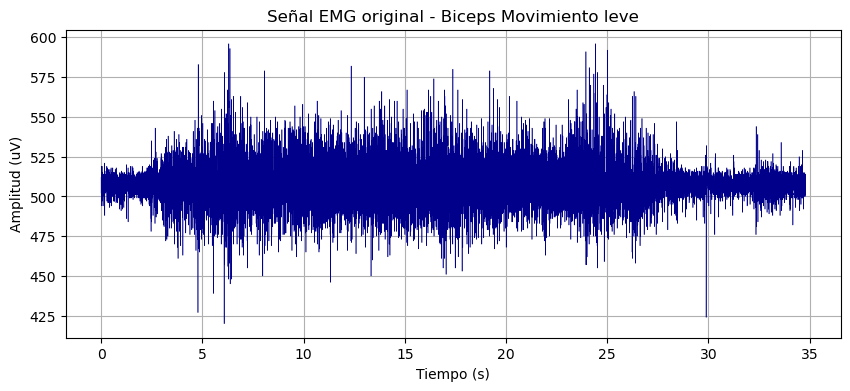

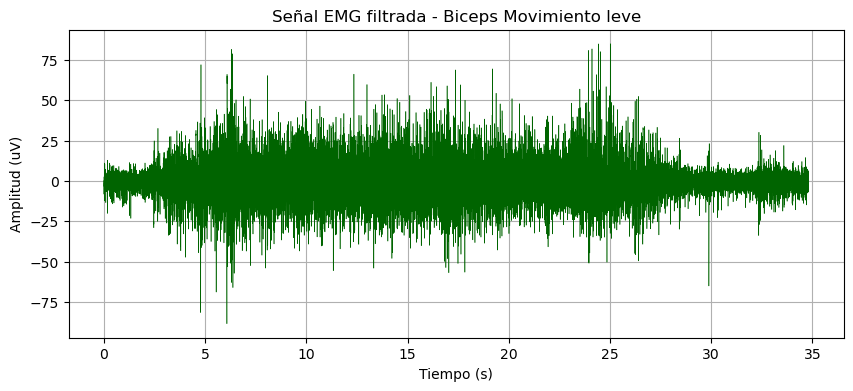

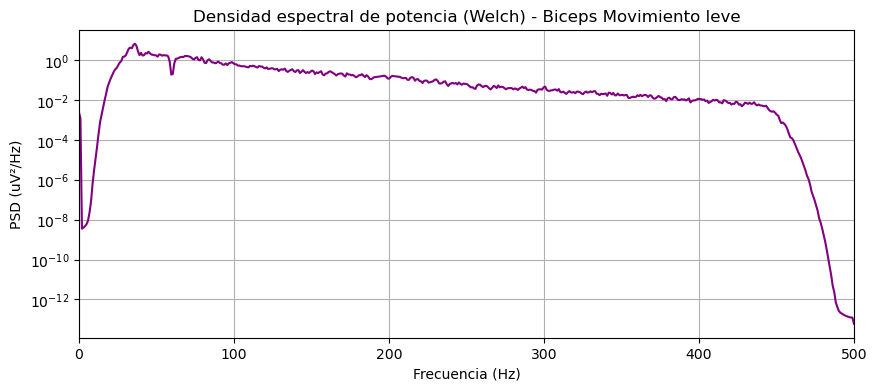

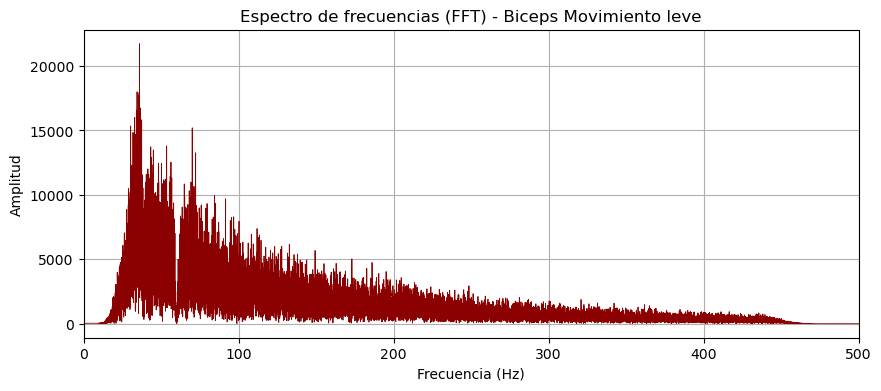

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, iirnotch

# Filtro pasa-banda
def filtro_pasabanda(señal, f_muestreo, frec_baja=20.0, frec_alta=450.0, orden=4):
    nyquist = 0.5 * f_muestreo  
    bajo = frec_baja / nyquist
    alto = frec_alta / nyquist
    b, a = butter(orden, [bajo, alto], btype="band")
    return filtfilt(b, a, señal)

# Filtro notch
def filtro_notch(señal, f_muestreo, frec_notch=60.0, Q=30.0):
    """
    frec_notch: frecuencia central a eliminar (Hz)
    Q: factor de calidad (más alto = más estrecho el notch)
    """
    nyquist = 0.5 * f_muestreo
    w0 = frec_notch / nyquist
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, señal)

# Cargar archivo
ruta = r"D:\IB PUCP - UPCH 2022\7mo Semestre\Introducción a las Señales Biomédicas\Lab 3 - Adquisicion EMG\pythoooooon\Biceps\Movimiento leve\leve1_biceps.txt"
datos = np.loadtxt(ruta, comments="#")
emg = datos[:, -1]  # señal EMG en la última columna
fs = 1000  # frecuencia de muestreo
tiempo = np.linspace(0, len(emg) / fs, len(emg))

# Señal original
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG original - Biceps Movimiento leve")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Aplicacion filtros
emg_filtrada = filtro_pasabanda(emg, fs)              # pasa-banda 20–450 Hz
emg_filtrada = filtro_notch(emg_filtrada, fs, 60, 30) # notch 60 Hz

# Señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg_filtrada, color="#006400", linewidth=0.4)
plt.title("Señal EMG filtrada - Biceps Movimiento leve")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Welch
nperseg = 1024
frecs, psd = welch(emg_filtrada, fs, nperseg=nperseg)

plt.figure(figsize=(10,4))
plt.semilogy(frecs, psd, color="purple")
plt.title("Densidad espectral de potencia (Welch) - Biceps Movimiento leve")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD (uV²/Hz)")
plt.xlim(0, 500)
plt.grid()
plt.show()

# FFT
fft_vals = np.fft.rfft(emg_filtrada)
fft_freqs = np.fft.rfftfreq(len(emg_filtrada), 1/fs)
fft_amp = np.abs(fft_vals)

plt.figure(figsize=(10,4))
plt.plot(fft_freqs, fft_amp, color="darkred", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - Biceps Movimiento leve")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 500)
plt.grid()
plt.show()


### 3. Reposo basal

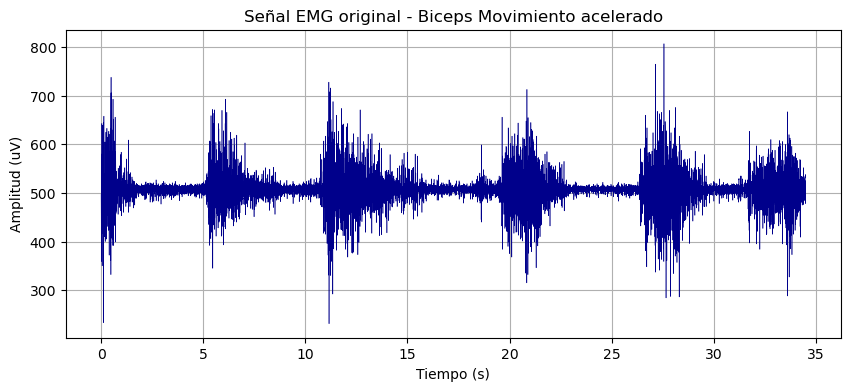

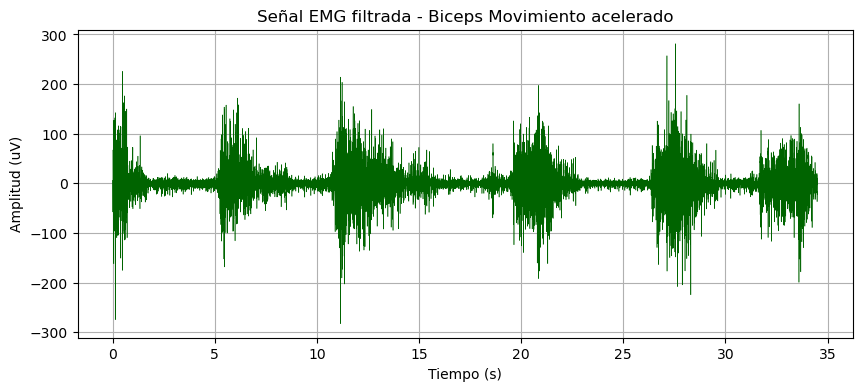

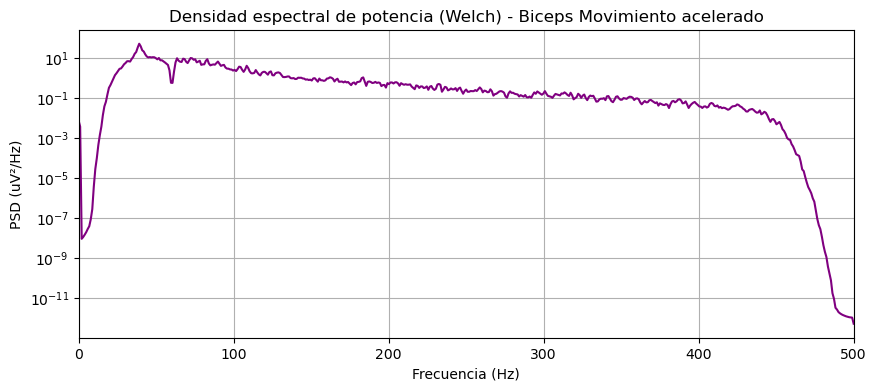

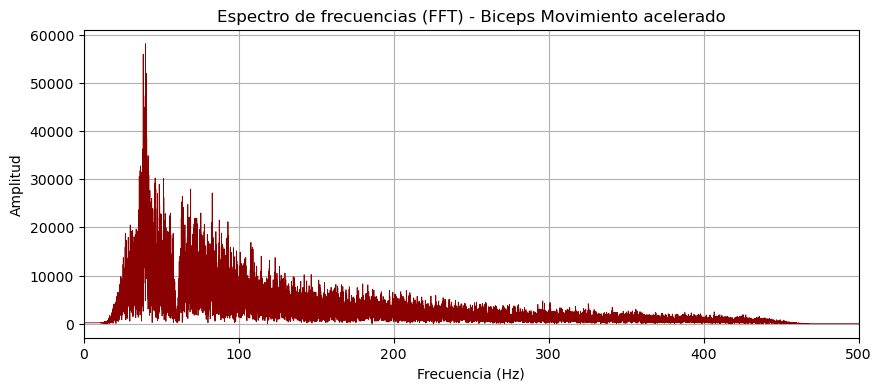

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, iirnotch

# Filtro pasa-banda
def filtro_pasabanda(señal, f_muestreo, frec_baja=20.0, frec_alta=450.0, orden=4):
    nyquist = 0.5 * f_muestreo  
    bajo = frec_baja / nyquist
    alto = frec_alta / nyquist
    b, a = butter(orden, [bajo, alto], btype="band")
    return filtfilt(b, a, señal)

# Filtro notch
def filtro_notch(señal, f_muestreo, frec_notch=60.0, Q=30.0):
    """
    frec_notch: frecuencia a eliminar (Hz)
    Q: factor de calidad (más alto = notch más estrecho)
    """
    nyquist = 0.5 * f_muestreo
    w0 = frec_notch / nyquist
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, señal)

# Cargar archivo
ruta = r"D:\IB PUCP - UPCH 2022\7mo Semestre\Introducción a las Señales Biomédicas\Lab 3 - Adquisicion EMG\pythoooooon\Biceps\Movimiento acelerado\rapido1_biceps.txt"
datos = np.loadtxt(ruta, comments="#")
emg = datos[:, -1]  # señal EMG en la última columna
fs = 1000  # frecuencia de muestreo
tiempo = np.linspace(0, len(emg) / fs, len(emg))

# Señal cruda
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG original - Biceps Movimiento acelerado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Aplicar filtros
emg_filtrada = filtro_pasabanda(emg, fs)              # pasa-banda 20–450 Hz
emg_filtrada = filtro_notch(emg_filtrada, fs, 60, 30) # notch 60 Hz

# Señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg_filtrada, color="#006400", linewidth=0.4)
plt.title("Señal EMG filtrada - Biceps Movimiento acelerado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Welch
nperseg = 1024
frecs, psd = welch(emg_filtrada, fs, nperseg=nperseg)

plt.figure(figsize=(10,4))
plt.semilogy(frecs, psd, color="purple")
plt.title("Densidad espectral de potencia (Welch) - Biceps Movimiento acelerado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD (uV²/Hz)")
plt.xlim(0, 500)
plt.grid()
plt.show()

# FFT
fft_vals = np.fft.rfft(emg_filtrada)
fft_freqs = np.fft.rfftfreq(len(emg_filtrada), 1/fs)
fft_amp = np.abs(fft_vals)

plt.figure(figsize=(10,4))
plt.plot(fft_freqs, fft_amp, color="darkred", linewidth=0.6)
plt.title("Espectro de frecuencias (FFT) - Biceps Movimiento acelerado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 500)
plt.grid()
plt.show()


### 4. Despues de una actividad fisica (11 minutos aprox)